#### Zugriff aus python mit Hilfe von Pandas

In [1]:
import sqlite3 as sql
import pandas as pd
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import dateutil
import datetime
import sklearn

Baue eine Verbindung zur meiner Datenbank auf:

In [2]:
conn = sql.connect('/Users/cm/20190408/home-assistant_v2.db')

### Die Daten aus der SQL mit Hilfe von Pandas auslesen

Tabellennamen ermitteln

In [3]:
table_names = pd.read_sql_query('select name from sqlite_master where type = "table"', conn)
table_names

,name
0,events
1,recorder_runs
2,schema_changes
3,states


Tabelle events einlesen

In [4]:
events = pd.read_sql_query('select * from events', conn)

In [83]:
events.tail(100)

,event_id,event_type,event_data,origin,time_fired,created,context_id,context_user_id
41710,41711,state_changed,"{""entity_id"": ""sun.sun"", ""old_state"": {""entity...",LOCAL,2019-04-08 20:34:30.007089,2019-04-08 20:34:30.017385,5dcc2209457b4a52bccbd9e36552e9c1,None
41711,41712,state_changed,"{""entity_id"": ""sun.sun"", ""old_state"": {""entity...",LOCAL,2019-04-08 20:35:30.007042,2019-04-08 20:35:30.015951,dd4c701698754519a569247d1c83738e,None
41712,41713,state_changed,"{""entity_id"": ""sun.sun"", ""old_state"": {""entity...",LOCAL,2019-04-08 20:36:30.007165,2019-04-08 20:36:30.017427,f1cf74d071bb4373b9bd13b22da7699b,None
41713,41714,state_changed,"{""entity_id"": ""sun.sun"", ""old_state"": {""entity...",LOCAL,2019-04-08 20:37:30.007569,2019-04-08 20:37:30.017843,154760e1dd104b03b51b7ddee5be943f,None
41714,41715,state_changed,"{""entity_id"": ""sun.sun"", ""old_state"": {""entity...",LOCAL,2019-04-08 20:38:30.007371,2019-04-08 20:38:30.017645,d8cf24d4d3cc430aa6bea627e95d0308,None
41715,41716,state_changed,"{""entity_id"": ""sun.sun"", ""old_state"": {""entity...",LOCAL,2019-04-08 20:39:30.007409,2019-04-08 20:39:30.017529,7f27ae5034ba438b8e53e2acdf2342bb,None
41716,41717,state_changed,"{""entity_id"": ""sun.sun"", ""old_state"": {""entity...",LOCAL,2019-04-08 20:40:30.006654,2019-04-08 20:40:30.015691,ede621d2c1014ec78a599f498ab63e64,None
41717,41718,state_changed,"{""entity_id"": ""sun.sun"", ""old_state"": {""entity...",LOCAL,2019-04-08 20:41:30.006743,2019-04-08 20:41:30.016859,c3b644a69738454faf6a53d2fb2e8582,None
41718,41719,state_changed,"{""entity_id"": ""sun.sun"", ""old_state"": {""entity...",LOCAL,2019-04-08 20:42:30.007146,2019-04-08 20:42:30.017245,c38f9bd427144533a969cc080ab535e1,None
41719,41720,state_changed,"{""entity_id"": ""climate.schlafzimmer_wandthermo...",LOCAL,2019-04-08 20:43:14.908602,2019-04-08 20:43:14.918218,5d6ea3ad885a4cb5be0edcbd9127dcfe,None


#### Tabelle recorder_runs einlesen

In [84]:
recorder_runs = pd.read_sql_query('select * from recorder_runs', conn)

In [85]:
recorder_runs.head()

,run_id,start,end,closed_incorrect,created
0,1,2019-03-12 22:48:20.868177,2019-03-12 22:53:18.617738,0,2019-03-12 22:48:23.980050
1,2,2019-03-12 22:53:30.678004,2019-03-18 22:46:20.636778,0,2019-03-12 22:53:33.324626
2,3,2019-03-18 22:46:33.514292,2019-03-24 21:43:44.047234,0,2019-03-18 22:46:36.190786
3,4,2019-03-24 21:50:36.016409,2019-03-24 22:02:31.807353,0,2019-03-24 21:50:39.080578
4,5,2019-03-24 22:02:53.786238,2019-03-24 22:12:00.639153,0,2019-03-24 22:02:56.422956


#### Tabelle schema_changes einlesen

In [86]:
schema_changes = pd.read_sql_query('select * from schema_changes', conn)

In [87]:
schema_changes.head()

,change_id,schema_version,changed
0,1,7,2019-03-12 22:48:23.927544


#### Tabelle states einlesen

In [88]:
states = pd.read_sql_query('select * from states', conn)

In [89]:
weather_opts =['weather_temperature','precipitation','wind_speed','pressure','wind_direction','humidity','fog','cloudiness','low_clouds','medium_clouds','high_clouds','dewpoint_temperature']

In [90]:
states

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
0,1,persistent_notification,persistent_notification.notification,notifying,"{""title"": ""Welcome Home!"", ""message"": ""Here ar...",6,2019-03-12 22:48:20.993128,2019-03-12 22:48:20.993128,2019-03-12 22:48:25.862709,ac0d388ca2f948dcb1791cd5e91539d4,None
1,2,zone,zone.home,zoning,"{""hidden"": true, ""latitude"": 53.552, ""longitud...",28,2019-03-12 22:48:24.430082,2019-03-12 22:48:24.430082,2019-03-12 22:48:27.453797,615fd0ebbc7740769a7008b16c88b498,None
2,3,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-13T05:06:33+00:00"", ""ne...",29,2019-03-12 22:48:24.430822,2019-03-12 22:48:24.430822,2019-03-12 22:48:27.523893,57d20b2e50e441a9bdd46e80cda32d26,None
3,4,sensor,sensor.yr_symbol,unknown,"{""attribution"": ""Weather forecast from met.no,...",65,2019-03-12 22:48:24.780412,2019-03-12 22:48:24.780412,2019-03-12 22:48:30.002484,87a4b6beb12c4b16abf6620ce9cc2742,None
4,5,group,group.all_devices,unknown,"{""entity_id"": [], ""order"": 0, ""auto"": true, ""f...",66,2019-03-12 22:48:24.781078,2019-03-12 22:48:24.781078,2019-03-12 22:48:30.072033,4dd9b0c50a6549aab44320e8670f1f96,None
5,6,sensor,sensor.yr_symbol,9,"{""attribution"": ""Weather forecast from met.no,...",71,2019-03-12 22:48:25.313220,2019-03-12 22:48:25.313220,2019-03-12 22:48:30.381933,8c19b12f6a8e484b9976a907e2094296,None
6,7,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-13T05:06:33+00:00"", ""ne...",90,2019-03-12 22:48:24.430822,2019-03-12 22:48:30.005951,2019-03-12 22:48:31.412550,a3d2c83391854b2f96c15ba52b976f31,None
7,8,persistent_notification,persistent_notification.config_entry_discovery,notifying,"{""title"": ""New devices discovered"", ""message"":...",95,2019-03-12 22:48:39.222233,2019-03-12 22:48:39.222233,2019-03-12 22:48:39.428368,d46cb64a95c64129ac349a279611435e,None
8,9,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-13T05:06:33+00:00"", ""ne...",98,2019-03-12 22:48:24.430822,2019-03-12 22:49:30.006789,2019-03-12 22:49:30.021974,8f97f299b80f43be94449a5e6e4bd89c,None
9,10,person,person.christianm,unknown,"{""editable"": true, ""id"": ""b3405a2d5e0843cda476...",100,2019-03-12 22:49:32.387348,2019-03-12 22:49:32.387348,2019-03-12 22:49:32.398510,c273b0e534734cf08a23e46d3166f02d,None


### Vertiefung der Datensuche in der states Tabelle entity sensor

In [91]:
sensor = states[states['entity_id'].str.contains('sensor')]

In [92]:
weather = states[states['entity_id'].str.contains('weather')]

In [93]:
weather.loc[:,'last_updated'] = weather.loc[:,'last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [94]:
weatherdata={}
for opt in weather_opts:
    df = states[states['entity_id'].str.contains(opt)][['state','last_updated']]
    df = df[df.state !='unknown']
    weatherdata[opt] = df
    
#states['entity_id'].str.contains('wind_speed')

In [95]:
weatherdata['weather_temperature'].tail(80)

,state,last_updated
33080,14.1,2019-04-05 12:05:02.604301
33172,14.6,2019-04-05 13:05:03.762466
33261,14.5,2019-04-05 14:05:04.675849
33358,14.1,2019-04-05 15:05:05.696976
33467,13.2,2019-04-05 16:05:06.585096
33562,11.2,2019-04-05 17:05:07.705630
33664,10.2,2019-04-05 18:05:08.564193
33752,9.1,2019-04-05 19:05:09.821449
33856,8.4,2019-04-05 20:05:10.643812
33953,8.5,2019-04-05 21:05:11.774400


In [96]:
state_sensor_living_room  = sensor[sensor['entity_id'].str.contains('living')]
state_sensor_living_room.head(10)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
20664,20665,sensor,sensor.current_temperature_living_room,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21140,2019-03-24 22:02:58.081555,2019-03-24 22:02:58.081555,2019-03-24 22:03:04.747438,bda6c210eb724ecca1f1787871cbd7a7,None
20682,20683,sensor,sensor.current_temperature_living_room,18.9,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21190,2019-03-24 22:02:59.422376,2019-03-24 22:02:59.422376,2019-03-24 22:03:08.259427,ddc9c611ec174046b0a125e50303a38c,None
20699,20700,sensor,sensor.current_temperature_living_room,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21275,2019-03-24 22:12:27.035515,2019-03-24 22:12:27.035515,2019-03-24 22:12:32.046845,4f87dbcdacfe4fac9881cca68000be58,None
20730,20731,sensor,sensor.current_temperature_living_room,18.9,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21339,2019-03-24 22:12:28.236272,2019-03-24 22:12:28.236272,2019-03-24 22:12:35.825178,54ea9c160be34d52ad5494d446838890,None
20736,20737,sensor,sensor.set_temperature_living_room,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21411,2019-03-24 22:21:42.993135,2019-03-24 22:21:42.993135,2019-03-24 22:21:47.744942,99adce0dcd80401381bd255bceb8f2d6,None
20742,20743,sensor,sensor.current_temperature_living_room,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21417,2019-03-24 22:21:42.997110,2019-03-24 22:21:42.997110,2019-03-24 22:21:48.148605,2d81ac0323c64b48bee80461e6488005,None
20772,20773,sensor,sensor.set_temperature_living_room,17.0,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21479,2019-03-24 22:21:44.159600,2019-03-24 22:21:44.159600,2019-03-24 22:21:51.850026,696c34ca9be54012954910a173a61eac,None
20778,20779,sensor,sensor.current_temperature_living_room,18.9,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21485,2019-03-24 22:21:44.165891,2019-03-24 22:21:44.165891,2019-03-24 22:21:52.256494,699c91efc6df49d8b7810d428cb3fb89,None
20793,20794,sensor,sensor.current_temperature_living_room,18.7,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21501,2019-03-24 22:41:07.754218,2019-03-24 22:41:07.754218,2019-03-24 22:41:07.956618,efe2a1bde2574fd2a5cfa952d534d59a,None
20797,20798,sensor,sensor.current_temperature_living_room,18.6,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21505,2019-03-24 22:57:20.683716,2019-03-24 22:57:20.683716,2019-03-24 22:57:20.700652,1a4d8383d0194849a83bdeec6232eeac,None


In [97]:
state_sensor_living_room_clean = state_sensor_living_room.loc[:,('entity_id','state','last_updated')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('temperature')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('wt')]
living_room_wt_tcurr = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('current')]
living_room_wt_tset = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('set')]


In [98]:
living_room_wt_tcurr.loc[:,'last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [99]:
living_room_wt_tset.loc[:,'last_updated'] = living_room_wt_tset['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [100]:
living_room_wt_tcurr[living_room_wt_tcurr.state =='unknown']

,entity_id,state,last_updated


In [192]:
living_room_wt_tcurr = living_room_wt_tcurr[living_room_wt_tcurr.state !='unknown']
living_room_wt_tcurr = living_room_wt_tcurr[living_room_wt_tcurr.state !='None']
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr['state'] = living_room_wt_tcurr['state'].astype(float)

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [193]:
living_room_wt_tset = living_room_wt_tset[living_room_wt_tset.state !='unknown']
living_room_wt_tset = living_room_wt_tset[living_room_wt_tset.state !='None']
living_room_wt_tset = living_room_wt_tset[(living_room_wt_tset['last_updated'] > start_date) & (living_room_wt_tset['last_updated'] < end_date)]
living_room_wt_tset['state'] = living_room_wt_tset['state'].astype(float)

In [194]:
living_room_wt_tcurr.head()

,entity_id,state,last_updated


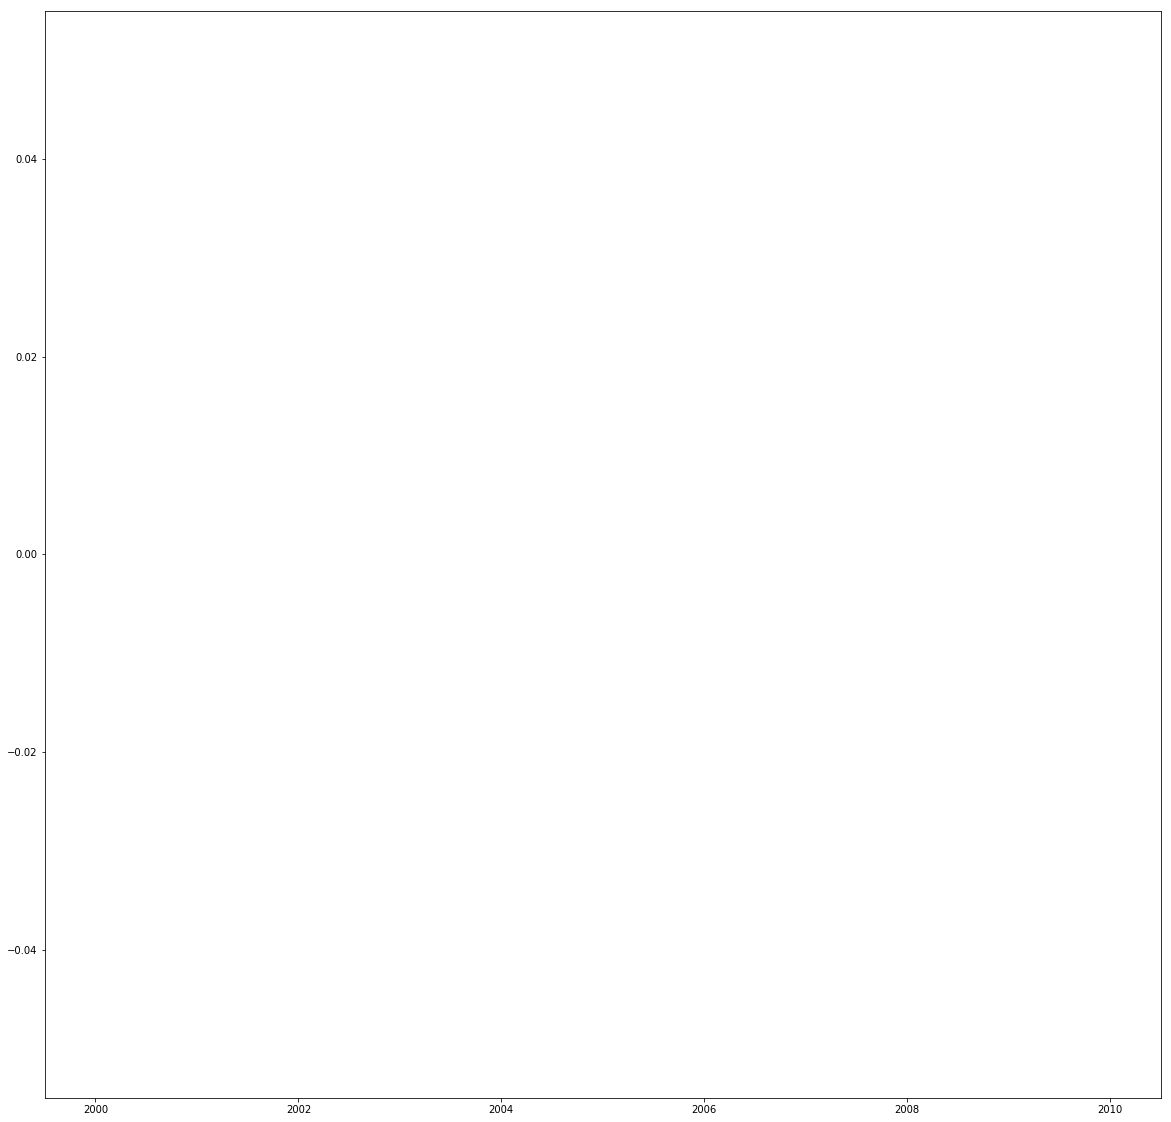

In [191]:
dates = matplotlib.dates.date2num(living_room_wt_tcurr['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
dates2 = matplotlib.dates.date2num(living_room_wt_tset['last_updated'])
matplotlib.pyplot.plot_date(dates2, living_room_wt_tset['state'], '-')
matplotlib.pyplot.plot_date(dates, living_room_wt_tcurr['state'], '-');

In [105]:
end_date = np.datetime64('2019-04-03 23:59:00')
start_date = np.datetime64('2019-04-03 00:00:00')

In [106]:
pd.read_sql_query('SELECT entity_id, COUNT(*) as count FROM states GROUP BY entity_id', conn).head()

,entity_id,count
0,binary_sensor.kuche_fensterkontakt_kuche,19
1,binary_sensor.remote_ui,7
2,binary_sensor.schlafzimmer_fensterkontakt_sz,15
3,binary_sensor.wohnzimmer_fensterkontakt_wz1,9
4,binary_sensor.wohnzimmer_fensterkontakt_wz2,1


In [107]:
living_room_wt_tcurr.head()

,entity_id,state,last_updated


In [108]:
#if living_room_wt_tcurr.dtypes[2] != np.:

living_room_wt_tcurr['last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [109]:
living_room_wt_tcurr.dtypes[2]

dtype('O')

In [110]:
living_room_wt_tcurr['weekday'] = living_room_wt_tcurr['last_updated'].dt.weekday
living_room_wt_tcurr['time'] = living_room_wt_tcurr['last_updated'].dt.time

AttributeError: Can only use .dt accessor with datetimelike values

In [111]:
living_room_wt_tcurr['time'] = living_room_wt_tcurr['time'].map(lambda x:x.hour+x.minute/60.0)

KeyError: 'time'

In [112]:
X_train = living_room_wt_tcurr.drop(['entity_id','state','last_updated'], axis=1)
y_train = living_room_wt_tcurr['state']

In [113]:
X_train.shape

(0, 0)

In [114]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr = living_room_wt_tcurr.sort_values(by=['state'])

### Vertiefung der Datensuche in der states Tabelle entity climate

In [115]:
climate = states[states['entity_id'].str.contains('climate')]

In [116]:
climate.groupby('entity_id').agg('sum')

,state_id,event_id
entity_id,,
climate.bad_thermostat_bad,516778,537674
climate.bad_wandthermostat_bad,51741,53112
climate.kinderzimmer_thermostat_kiz,4041537,4171747
climate.kuche_thermostat_kuche,2213319,2291104
climate.kuche_wandthermostat_ku,26248537,27095256
climate.schlafzimmer_thermostat_sz,3108734,3209943
climate.schlafzimmer_wandthermostat_sz,29497697,30456641
climate.wohnzimmer_thermostat_1_wz,4320071,4456097
climate.wohnzimmer_thermostat_2_wz,4443426,4584971


In [117]:
state_climate_living_room  = climate[climate['entity_id'].str.contains('schlaf')]
state_climate_living_room.head(2)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
20,21,climate,climate.schlafzimmer_thermostat_sz,auto,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",195,2019-03-12 22:53:36.221414,2019-03-12 22:53:36.221414,2019-03-12 22:53:40.634904,a55985718e3a4fe8ab6b3c7626444c80,None
23,24,climate,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 17.4, ""min_temp"": 4.5,...",198,2019-03-12 22:53:36.227011,2019-03-12 22:53:36.227011,2019-03-12 22:53:40.811380,133d0ac3812b4ade882ead5785287866,None


In [118]:
state_climate_living_room = state_climate_living_room.loc[:,('entity_id','state','attributes','last_updated')]

In [119]:
state_climate_living_room['last_updated'] = state_climate_living_room['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [120]:
state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date) & (state_climate_living_room['last_updated'] < end_date)]

In [121]:
state_climate_living_room['weekday'] = state_climate_living_room['last_updated'].dt.weekday
state_climate_living_room['time'] = state_climate_living_room['last_updated'].dt.time

In [122]:
state_climate_living_room.head(2)

,entity_id,state,attributes,last_updated,weekday,time
27464,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 20.9, ""min_temp"": 4.5,...",2019-04-03 00:25:21.861743,2,00:25:21.861743
27471,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 20.8, ""min_temp"": 4.5,...",2019-04-03 00:30:24.888936,2,00:30:24.888936


In [123]:
#state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date) & (state_climate_living_room['last_updated'] < end_date)]

In [124]:
current_temp = []
set_temp = []
for value in state_climate_living_room['attributes']:
    json_acceptable_string = value.replace("'", "\"")
    dicti = json.loads(json_acceptable_string)
    current_temp.append(dicti['current_temperature'])
    set_temp.append(dicti['temperature'])

In [125]:
state_climate_living_room['current_temp'] = current_temp
state_climate_living_room['set_temp'] = set_temp

In [126]:
state_climate_living_room_as_x = state_climate_living_room.drop(['entity_id','attributes','last_updated'],axis=1)

In [127]:
state_climate_living_room_as_x.head(30)

,state,weekday,time,current_temp,set_temp
27464,auto,2,00:25:21.861743,20.9,19.0
27471,auto,2,00:30:24.888936,20.8,19.0
27484,auto,2,00:40:36.890399,20.9,19.0
27493,auto,2,00:45:41.899956,20.8,19.0
27531,auto,2,01:06:01.838903,20.9,19.0
27538,auto,2,01:11:06.856682,20.8,19.0
27555,auto,2,01:26:21.887667,20.7,19.0
27562,auto,2,01:31:26.899067,20.8,19.0
27575,auto,2,01:41:34.910202,20.7,19.0
27620,auto,2,02:12:04.863776,20.8,19.0


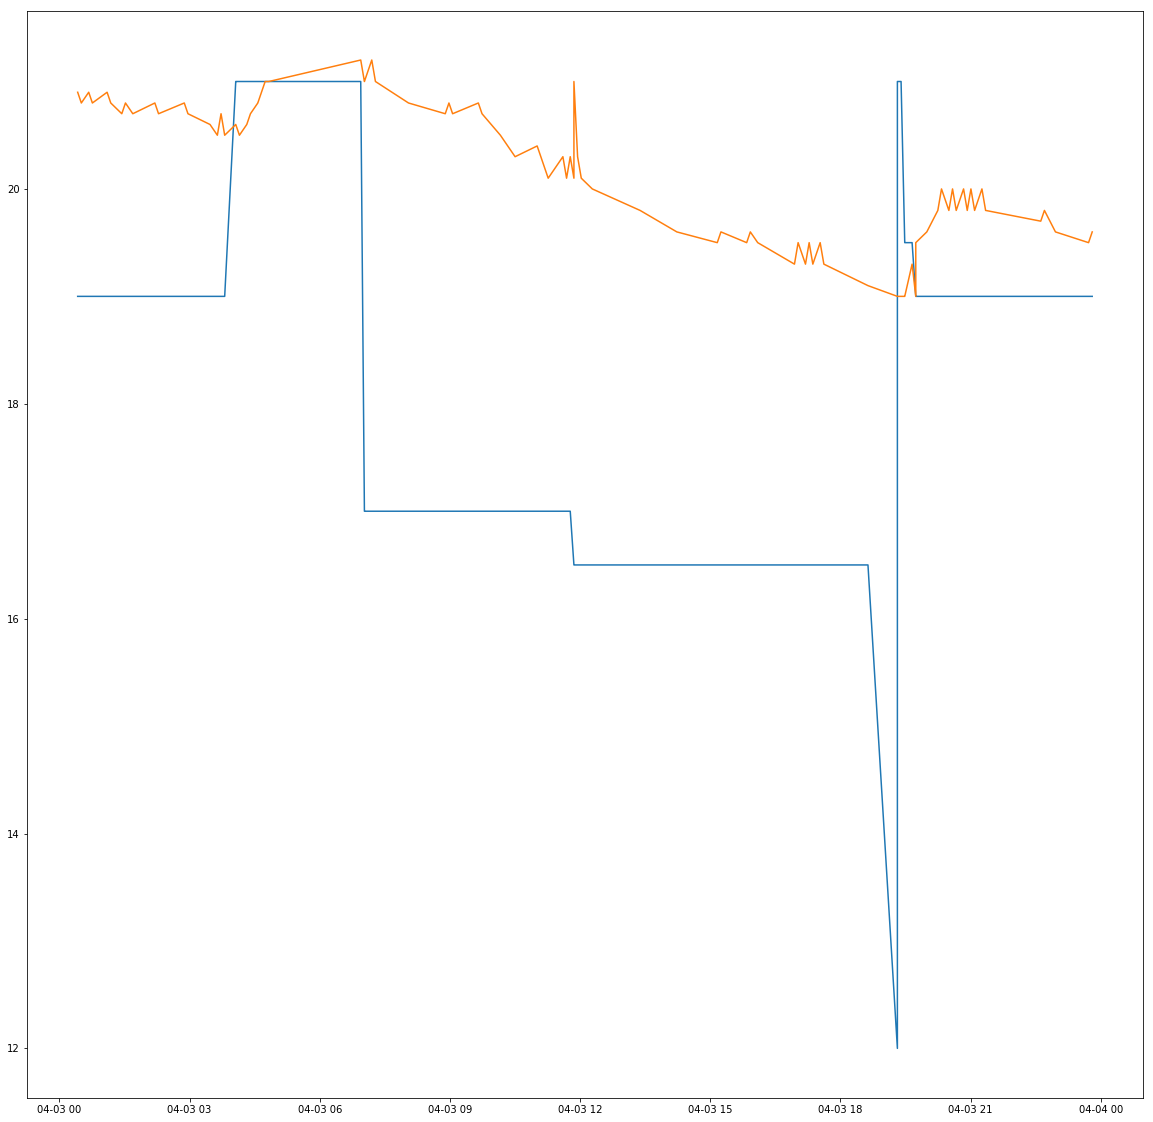

In [128]:
dates = matplotlib.dates.date2num(state_climate_living_room['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.plot_date(dates, set_temp, '-')
matplotlib.pyplot.plot_date(dates, current_temp, '-')
#matplotlib.pyplot.plot_date(dates, state_climate_living_room_as_x['twp'], '-');

In [129]:
time_steps = [datetime.time(0, 0, 0, 0),datetime.time(6, 30, 0, 0),datetime.time(20, 30, 0, 0),datetime.time(21, 30, 0, 0),datetime.time(23, 59, 0, 0)]
set_temp_wp = [17.0, 20.0, 18.5,17.0,17.0]

In [130]:
def add_wp(time_steps,set_temps,time_row):
    for index, ti in enumerate(time_steps):
        if time_row < ti:
            #print(str(time_row) + ' ' +str(ti)+' ' + str(index) + ' ' + str(set_temps[index-1]))
            return set_temps[index-1]
    

In [131]:
weekprogram = []
for row in state_climate_living_room_as_x.index:
    weekprogram.append(add_wp(time_steps, set_temp_wp, state_climate_living_room_as_x.loc[row,'time']))

In [132]:
state_climate_living_room_as_x['twp'] = weekprogram

In [133]:
state_climate_living_room_as_x

,state,weekday,time,current_temp,set_temp,twp
27464,auto,2,00:25:21.861743,20.9,19.0,17.0
27471,auto,2,00:30:24.888936,20.8,19.0,17.0
27484,auto,2,00:40:36.890399,20.9,19.0,17.0
27493,auto,2,00:45:41.899956,20.8,19.0,17.0
27531,auto,2,01:06:01.838903,20.9,19.0,17.0
27538,auto,2,01:11:06.856682,20.8,19.0,17.0
27555,auto,2,01:26:21.887667,20.7,19.0,17.0
27562,auto,2,01:31:26.899067,20.8,19.0,17.0
27575,auto,2,01:41:34.910202,20.7,19.0,17.0
27620,auto,2,02:12:04.863776,20.8,19.0,17.0


In [134]:
categorical = pd.get_dummies(state_climate_living_room_as_x[['state']])
state_climate_living_room_as_x = pd.concat([state_climate_living_room_as_x, categorical], axis=1, sort=False)



In [135]:
state_climate_living_room_as_x['time'] = state_climate_living_room_as_x['time'].map(lambda x:x.hour+x.minute/60.0)

In [139]:
state_climate_living_room_as_x_clean = state_climate_living_room_as_x[state_climate_living_room_as_x['state'].str.contains('auto')]

In [140]:
state_climate_living_room_as_x_clean.head()

,state,weekday,time,current_temp,set_temp,twp,state_auto,state_manual
27464,auto,2,0.416667,20.9,19.0,17.0,1,0
27471,auto,2,0.500000,20.8,19.0,17.0,1,0
27484,auto,2,0.666667,20.9,19.0,17.0,1,0
27493,auto,2,0.750000,20.8,19.0,17.0,1,0
27531,auto,2,1.100000,20.9,19.0,17.0,1,0


In [141]:
state_climate_living_room_as_x_clean = state_climate_living_room_as_x_clean[state_climate_living_room_as_x_clean.current_temp != 0.0]

In [142]:
X_train = state_climate_living_room_as_x_clean.drop(['current_temp','state','twp'], axis=1)
y_train = state_climate_living_room_as_x_clean['current_temp']

In [143]:
y_train

27464    20.9
27471    20.8
27484    20.9
27493    20.8
27531    20.9
27538    20.8
27555    20.7
27562    20.8
27575    20.7
27620    20.8
27629    20.7
27667    20.8
27680    20.7
27725    20.6
27737    20.5
27745    20.7
27752    20.5
27769    20.6
27776    20.6
27800    20.5
27820    20.6
27839    20.7
27857    20.8
27858    20.8
27873    21.0
27882    21.0
28052    21.2
28064    21.0
28067    21.0
28092    21.2
         ... 
28426    20.3
28440    20.1
28467    20.3
28478    20.1
28492    20.3
29237    19.0
29246    19.0
29263    19.0
29279    19.0
29280    19.0
29302    19.3
29309    19.0
29310    19.5
29343    19.6
29374    19.8
29387    20.0
29403    19.8
29415    20.0
29423    19.8
29445    20.0
29454    19.8
29463    20.0
29493    19.8
29511    20.0
29518    19.8
29616    19.7
29623    19.8
29640    19.6
29705    19.5
29712    19.6
Name: current_temp, Length: 70, dtype: float64

In [144]:
X_train.min()

weekday          2.000000
time             0.416667
set_temp        12.000000
state_auto       1.000000
state_manual     0.000000
dtype: float64

In [145]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [146]:
min_max_scaler.fit(X_train)

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [147]:
X_train = min_max_scaler.transform(X_train)

In [148]:
X_train.shape

(70, 5)

In [173]:
from sklearn.neighbors import KNeighborsRegressor

In [175]:
train_errors = []
test_errors = []

for k in range(1,50):
    knn_iterated = KNeighborsRegressor(k)
    # Training
    knn_iterated.fit(X_train, y_train)
    
    # Predict
    y_k_predict = knn_iterated.predict(X_train)
    train_errors.append((1.0 * (y_train - y_k_predict)).mean())

#    y_k_predict = knn_iterated.predict(X_test)
#    test_errors.append((1.0 * (y_test - y_k_predict)).mean())

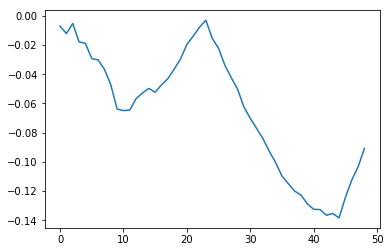

In [176]:
matplotlib.pyplot.plot(train_errors);

In [177]:
knn = KNeighborsRegressor(10)
knn.fit(X_train, y_train)
y_k_predict = knn.predict(X_train)

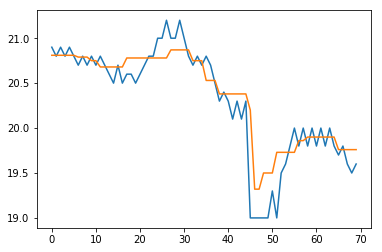

In [178]:
matplotlib.pyplot.plot(list(y_train))
matplotlib.pyplot.plot(y_k_predict.reshape(y_k_predict.shape[0]));

In [179]:
D_in = 5
D_out = 1
N = X_train.shape[0]

In [180]:
# Zufällige initialisierung der Gewichte
w = np.random.randn(D_in, D_out)
w

array([[ 1.32308442],
       [ 1.12567323],
       [ 3.00510461],
       [-0.8035393 ],
       [-1.72721367]])

In [181]:
learning_rate = 1e-1

In [182]:
loss_hist = []
# Train
for t in range(1000):
    # Berechne die Vorhersage
    y_pred = X_train.dot(w)
    y_pred = y_pred.reshape(y_pred.shape[0])
    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    loss = np.square(y_pred - y_train).sum()
    if t % 1 == 0:
        loss_hist.append(loss)
        print(t, loss)

    # Berechne die Gradienten von w1 im Bezug auf den Fehler 
    grad_y_pred = 2.0 * (y_pred - y_train)
    grad_w = (1/N) * X_train.T.dot(grad_y_pred)

    # Aktualisiere die Gewichte mittels Gradienten Abstieg
    w -= learning_rate * grad_w.reshape(5,1)

0 21594.879580641682
1 15684.985029418944
2 11543.098192551575
3 8638.644506821392
4 6600.335645897032
5 5168.347137646938
6 4160.853745155148
7 3450.61196185151
8 2948.5731630772566
9 2592.416591398674
10 2338.5250880034896
11 2156.3699504481883
12 2024.5816220046404
13 1928.2000735631716
14 1856.7506978179179
15 1802.897871450902
16 1761.5027516298208
17 1728.9639433427853
18 1702.756111195772
19 1681.1071068428078
20 1662.7720256027944
21 1646.8750913590636
22 1632.7990058297762
23 1620.1075121712202
24 1608.4912011740607
25 1597.7295821319588
26 1587.6645354434133
27 1578.1817300104537
28 1569.1976143609613
29 1560.6503082886406
30 1552.4932241459628
31 1544.6905984484379
32 1537.2143604336052
33 1530.0419363510766
34 1523.1547087134195
35 1516.536934027483
36 1510.1749815093885
37 1504.0567965614757
38 1498.1715216727787
39 1492.509227616353
40 1487.0607219606
41 1481.8174118092609
42 1476.7712046109714
43 1471.9144357261573
44 1467.2398148309585
45 1462.7403856115443
46 1458.4094

495 1346.9741027711993
496 1346.9741026177578
497 1346.9741024700552
498 1346.974102327878
499 1346.9741021910193
500 1346.9741020592796
501 1346.974101932468
502 1346.9741018103996
503 1346.9741016928976
504 1346.974101579791
505 1346.9741014709148
506 1346.9741013661119
507 1346.9741012652282
508 1346.9741011681192
509 1346.974101074642
510 1346.9741009846616
511 1346.974100898047
512 1346.974100814672
513 1346.9741007344167
514 1346.9741006571621
515 1346.974100582798
516 1346.974100511216
517 1346.9741004423106
518 1346.9741003759832
519 1346.9741003121367
520 1346.9741002506787
521 1346.9741001915193
522 1346.974100134573
523 1346.9741000797567
524 1346.9741000269908
525 1346.9740999761987
526 1346.9740999273067
527 1346.9740998802436
528 1346.9740998349412
529 1346.9740997913323
530 1346.9740997493552
531 1346.9740997089489
532 1346.9740996700536
533 1346.974099632613
534 1346.9740995965726
535 1346.974099561881
536 1346.9740995284867
537 1346.9740994963418
538 1346.9740994653994

930 1346.9740986691315
931 1346.974098669131
932 1346.9740986691318
933 1346.9740986691313
934 1346.9740986691313
935 1346.974098669131
936 1346.974098669131
937 1346.9740986691313
938 1346.9740986691309
939 1346.9740986691315
940 1346.974098669131
941 1346.974098669131
942 1346.9740986691315
943 1346.974098669131
944 1346.9740986691309
945 1346.9740986691315
946 1346.9740986691318
947 1346.9740986691315
948 1346.9740986691313
949 1346.9740986691315
950 1346.974098669131
951 1346.974098669131
952 1346.9740986691306
953 1346.9740986691313
954 1346.9740986691315
955 1346.9740986691313
956 1346.9740986691318
957 1346.974098669131
958 1346.9740986691315
959 1346.974098669131
960 1346.9740986691313
961 1346.9740986691309
962 1346.974098669131
963 1346.9740986691313
964 1346.974098669131
965 1346.974098669131
966 1346.9740986691309
967 1346.9740986691313
968 1346.9740986691313
969 1346.9740986691309
970 1346.9740986691318
971 1346.974098669131
972 1346.974098669131
973 1346.9740986691313
974

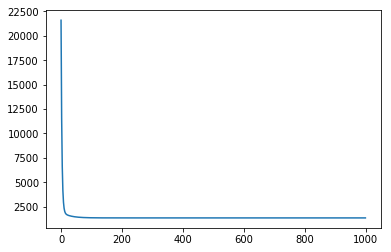

In [183]:
matplotlib.pyplot.plot(loss_hist);

In [184]:
y_pred = X_train.dot(w)

In [185]:
len(list(y_pred.reshape(y_pred.shape[0])))

70

In [186]:
sklearn.metrics.mean_squared_error(list(y_train), list(y_pred.reshape(y_pred.shape[0])))

19.24248712384473

In [187]:
len(list(y_train))

70

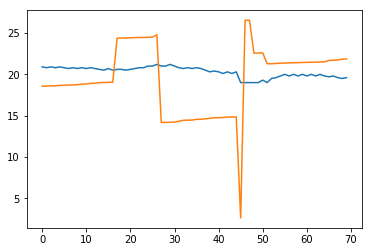

In [188]:

matplotlib.pyplot.plot(list(y_train))
matplotlib.pyplot.plot(list(y_pred));

In [189]:
#error = 
error = list(np.array(list(y_train)) - np.array(list(y_pred.reshape(y_pred.shape[0]))))

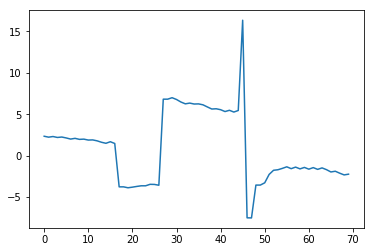

In [190]:
matplotlib.pyplot.plot(error);